# Keystroke Detection

https://github.com/PacktPublishing/Hands-On-Artificial-Intelligence-for-Cybersecurity/blob/master/Chapter06/sources/Keystroke%20Detection.ipynb

In [1]:
!wget https://www.cs.cmu.edu/~keystroke/DSL-StrongPasswordData.csv

--2022-08-10 21:42:07--  https://www.cs.cmu.edu/~keystroke/DSL-StrongPasswordData.csv
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4669935 (4.5M) [text/csv]
Saving to: ‘DSL-StrongPasswordData.csv’

DSL-StrongPasswordD 100%[===================>]   4.45M  1.46MB/s    in 3.1s    

2022-08-10 21:42:10 (1.46 MB/s) - ‘DSL-StrongPasswordData.csv’ saved [4669935/4669935]



In [2]:
ls

DSL-StrongPasswordData.csv  sample_data/


In [4]:
cat DSL-StrongPasswordData.csv | head

subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
s002,1,4,0.1291,0.2515,0.1224,0.1059,0

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
pwd_data = pd.read_csv("./DSL-StrongPasswordData.csv", header = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


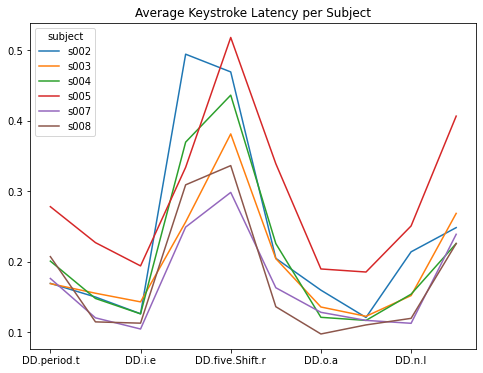

In [7]:
# Average Keystroke Latency per Subject

DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD]
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()

plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')

In [8]:
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)

X_train = data_train[pwd_data.columns[2:]]
y_train = data_train['subject']

X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

In [9]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.3730392156862745


In [10]:
svc = svm.SVC(kernel='linear') 
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)

Support Vector Linear Classifier Accuracy: 0.7629901960784313


In [11]:
mlpc = MLPClassifier()
mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)

mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy: 0.9090686274509804


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Text(0, 0.5, 'True')

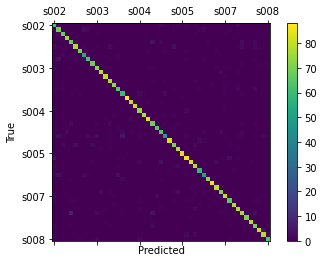

In [13]:
from sklearn.metrics import confusion_matrix

labels = list(pwd_data['subject'].unique())
#cm = confusion_matrix(y_test, y_pred, labels) 
cm = confusion_matrix(y_test, y_pred)

figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')